## Imports

In [40]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

from src.ppo import ppo

In [2]:
env = gym.make('CartPole-v1', render_mode='human')
env.reset()
for _ in range(1000):
    env.render()
    action = env.action_space.sample() # your agent here (this takes random actions)
    next_state, reward, done, _, info = env.step(action) # take a random action
    
    if done:
        continue
    
env.close()


c:\ProgramData\anaconda3\envs\CartPole\Lib\site-packages\gymnasium\envs\classic_control\cartpole.py:180: UserWarning: WARN: You are calling 'step()' even though this environment has already returned terminated = True. You should always call 'reset()' once you receive 'terminated = True' -- any further steps are undefined behavior.
  logger.warn(


KeyboardInterrupt: 

In [52]:
env = gym.make('CartPole-v1')#, render_mode='human')
env.reset()

Kp = 38.8
Ki = 25.2
Kd = 15

#Kp = 135
#Ki = 96.5
#Kd = 47.5

force = 0
integral = 0

steps = [0.02*i for i in range(4000)]
angles_list = []
for _ in range(4000):
    #env.render()

    observation, reward, done, _, info = env.step(force)

    angle = observation[2]
    angular_velocity = observation[3]

    integral = integral + angle

    F = Kp*angle + Kd*angular_velocity + Ki*integral

    force = 1 if F > 0 else 0
    if done:
        observation = env.reset()
        integral = 0

    angles_list.append(angle)


env.close()

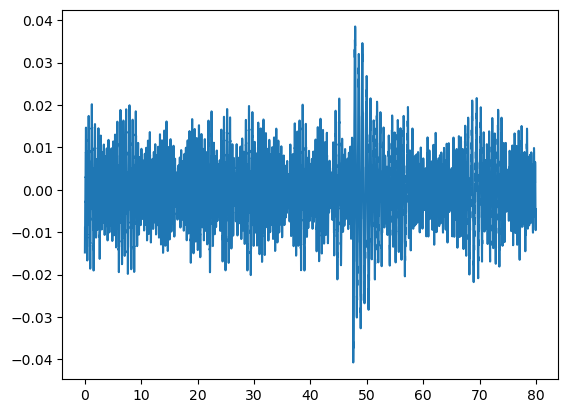

In [53]:
plt.plot(steps, angles_list)
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.title('Pole Angle vs Time')
plt.show()

In [18]:
# I want to know some internal variables used in the cart pole environment such as the gravity, mass of the cart, mass of the pole
env = gym.make('CartPole-v1')
print(env.gravity)
print(env.masscart)
print(env.masspole)
print(env.total_mass)
print(env.length)
print(env.polemass_length)
print(env.force_mag)
print(env.tau)
print(env.kinematics_integrator)

# what is the moment of inertia
print(env.masspole * env.length**2)


9.8
1.0
0.1
1.1
0.5
0.05
10.0
0.02
euler
0.025


c:\ProgramData\anaconda3\envs\CartPole\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.polemass_length to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.polemass_length` for environment variables or `env.get_wrapper_attr('polemass_length')` that will search the reminding wrappers.
  logger.warn(
c:\ProgramData\anaconda3\envs\CartPole\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.force_mag to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.force_mag` for environment variables or `env.get_wrapper_attr('force_mag')` that will search the reminding wrappers.
  logger.warn(
c:\ProgramData\anaconda3\envs\CartPole\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.tau to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.tau`